In [1]:
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
tf.__version__

'2.4.1'

In [3]:
data = "./"

In [4]:
train_link  = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [5]:
## Thu vien dung de load file
import pickle

In [6]:
with open(train_link, mode="rb") as f:
    train = pickle.load(f)
with open(valid_link, mode="rb") as f:
    valid = pickle.load(f)
with open(test_link, mode="rb") as f:
    test = pickle.load(f)

In [7]:
trainX = train["features"]
trainY = train["labels"]

In [9]:
trainX[0].shape

(32, 32, 3)

In [11]:
import matplotlib.pyplot as plt

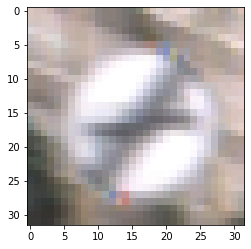

In [13]:
plt.imshow(trainX[50])

In [10]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [11]:
classNames[trainY[0]]

'End of no passing'

In [12]:
from sklearn.utils import shuffle

In [13]:
trainX, trainY = shuffle(trainX, trainY)

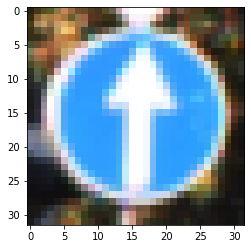

In [14]:
plt.imshow(trainX[0])


In [15]:
validX = valid["features"]
validY = valid["labels"]

In [16]:
testX = test["features"]
testY = test["labels"]

In [17]:
# Buoc tiep theo la phai chuan hoa ve [0,1]

trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
trainX[0]

In [ ]:
# Chuyen labels sang dang one-hot encoding
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb  = LabelBinarizer()

In [ ]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [18]:
# Xay dung model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()

In [ ]:
width = 32
height = 32
classes = 43

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3,3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3,3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3,3), padding="same"))


In [ ]:
model.add(Activation("relu"))


In [ ]:
model.add(BatchNormalization())


In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))


In [ ]:
model.summary()

In [ ]:
# Data augmentation

aug = ImageDataGenerator(rotation_range=0.20, height_shift_range=0.2, zoom_range=0.5, horizontal_flip=True, vertical_flip=True)

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 10

batch_size = 64

In [ ]:
model.compile(optimizer=SGD(learning_rate=learning_rate, momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Starting training ...")

model_trained = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1 )

In [ ]:
model.save("model_trained.h5")

In [ ]:
result = model.predict(testX[0:1])

In [ ]:
plt.imshow(testX[0])

In [ ]:
import numpy as np

In [ ]:
final = np.argmax(result)

In [ ]:
classNames[final]


In [19]:
model_saved = load_model("./model_trained.h5")

In [20]:
model_saved.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [21]:
model_saved.predict(testX[0:1])

array([[1.02726247e-07, 1.09852494e-09, 2.24866898e-08, 3.16294324e-10,
        9.50569579e-09, 4.37639116e-08, 1.13177904e-07, 2.16782973e-05,
        1.41769651e-05, 1.25174302e-05, 3.52002360e-07, 6.61690591e-10,
        7.86172738e-10, 1.14497478e-09, 2.96598773e-10, 6.15905037e-07,
        9.99950171e-01, 1.90838323e-09, 4.19230380e-11, 9.63396116e-12,
        6.74089062e-10, 7.62591379e-13, 2.60050879e-08, 4.65941230e-10,
        1.20056244e-12, 8.33660430e-09, 9.16862419e-12, 1.00038337e-11,
        3.04508016e-11, 4.64601219e-10, 8.26802520e-08, 5.22662447e-09,
        7.59874919e-09, 5.11837361e-12, 1.60077072e-08, 5.42942531e-11,
        1.17788890e-13, 4.10312895e-09, 3.47049078e-09, 1.97398833e-10,
        1.13303489e-09, 1.17578196e-08, 7.60907515e-09]], dtype=float32)